# 📈 <font color='367588'>**Time Series Analysis on S&P 500 Index (2020–2025)**</font>

In this analysis, we'll explore the **closing prices of the S&P 500 index** from the year **2023 to 2025**.

---

## Objectives: 

- Understand the structure and behavior of time series data.
- Explore key features like **trends**, **seasonality**, and **variance changes**.
- Use visual tools like **ACF (Autocorrelation Function)** and **PACF (Partial Autocorrelation Function)** plots.
- Learn how to check if a time series is **stationary** (a requirement for many forecasting models).
- If the data is **non-stationary**, we’ll apply techniques to **transform it into a stationary series**.
- Finally, we’ll try to apply appropraite model suitable according to the data at hand.
---



## Instead of analyzing the raw closing prices directly, we will work with the **log returns** of the prices.

This is a common practice in financial time series analysis because:

- Log returns help **stabilize the variance**.
- They make the data easier to model.
- They allow for **better comparisons** over time.

 
> Raw prices can fluctuate widely and grow over time, but log returns help us see **relative changes** in price (i.e., percent changes), which is more useful for modeling and analysis.

---
## <font color='367588'>Let’s get started  and begin exploring! </font>


In [74]:
#import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [75]:
#BEgin with loading the dataset using yfinance library.

import yfinance as yf
import pandas as pd

#Download S&P 500 data
sp500 = yf.download('^GSPC', start='2020-01-01', end='2025-05-23')
sp500_df = sp500[['Close']].copy()

#Move date from index to column
sp500_df.reset_index(inplace=True)  
sp500_df.columns = ['Date', 'Closing_Price']

# Convert date again to index 
sp500_df.set_index('Date', inplace=True)
sp500_df

[*********************100%***********************]  1 of 1 completed


,Closing_Price
Date,
2020-01-02,3257.850098
2020-01-03,3234.850098
2020-01-06,3246.280029
2020-01-07,3237.179932
2020-01-08,3253.050049
...,...
2025-05-16,5958.379883
2025-05-19,5963.600098
2025-05-20,5940.459961


In [76]:
sp500_df.shape

(1355, 1)

In [77]:
sp500_df.describe() 

,Closing_Price
count,1355.000000
mean,4367.252060
std,838.147235
min,2237.399902
25%,3852.105103
50%,4288.049805
75%,4793.300049
max,6144.149902


In [78]:
sp500_df.isnull().sum()

Closing_Price    0
dtype: int64

In [79]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1355 entries, 2020-01-02 to 2025-05-22
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing_Price  1355 non-null   float64
dtypes: float64(1)
memory usage: 21.2 KB


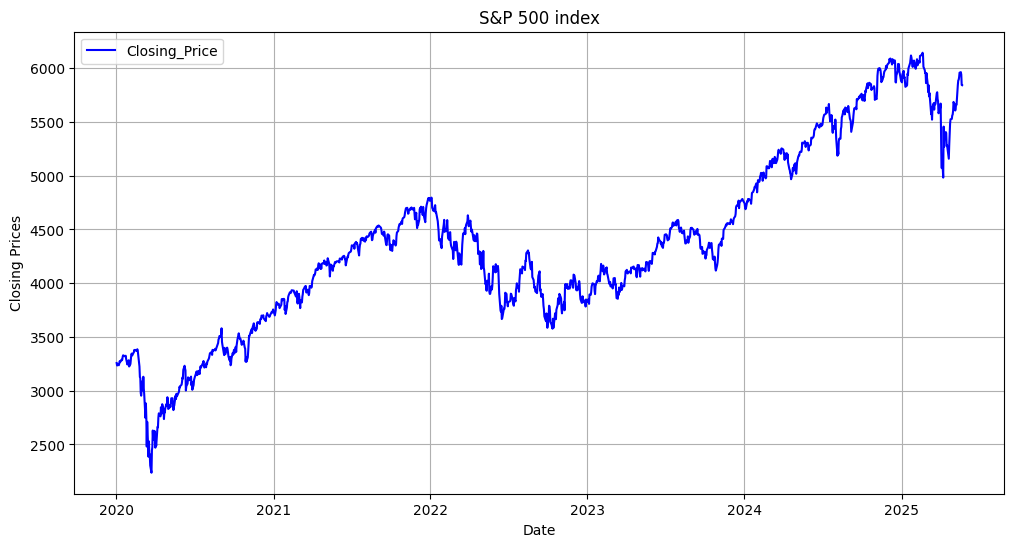

In [80]:
#Lets have a look at the graph Date vs closing Price

def plot_timeseries(df:pd.DataFrame,x_label,y_label,col):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[col], label=col, color="blue")
    plt.title("S&P 500 index")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()
plot_timeseries(sp500_df,"Date","Closing Prices","Closing_Price")




## Heading to Seasonal Decomposition

**Seasonal decomposition** is a time series analysis technique that breaks down a time series into three main components:

1. **Trend** – the long-term progression or direction of the data.
2. **Seasonality** – repeating patterns or cycles at regular intervals (e.g., yearly, monthly).
3. **Residual** – random noise or irregular fluctuations after removing trend and seasonality.

---

### Why Do We Need It?

- Seasonal decomposition is a powerful technique that can help us to gain insights into the underlying dynamics of time series data and make more accurate predictions for the future.

### Things to Consider Before Seasonal Decomposition

- **Model Selection**
  - Decide whether an additive or multiplicative model is appropriate based on whether seasonal fluctuations remain constant (additive) or vary with the trend (multiplicative).

- **Identify Seasonality Period**
  - Use domain knowledge, plots, autocorrelation, or spectral analysis to determine the correct seasonal period.
---

### Choosing the Right Seasonal Window

- **Too small a window:** Overfits noise, mistaking random fluctuations for seasonality.
- **Too large a window:** Oversmooths, missing real seasonal patterns and trend shifts.
- **Balance is key:** The window should be large enough to smooth out noise but small enough to capture genuine seasonality.


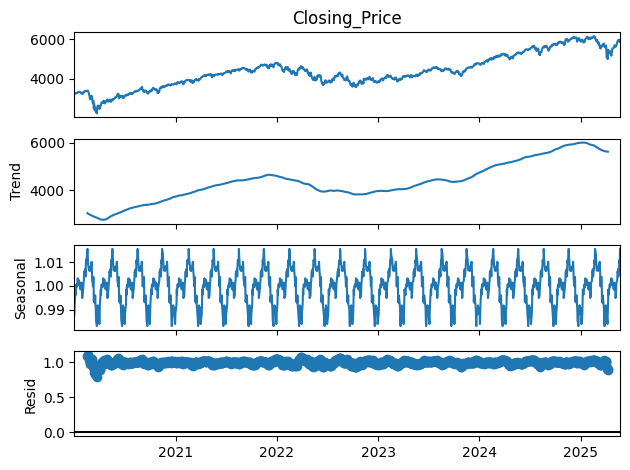

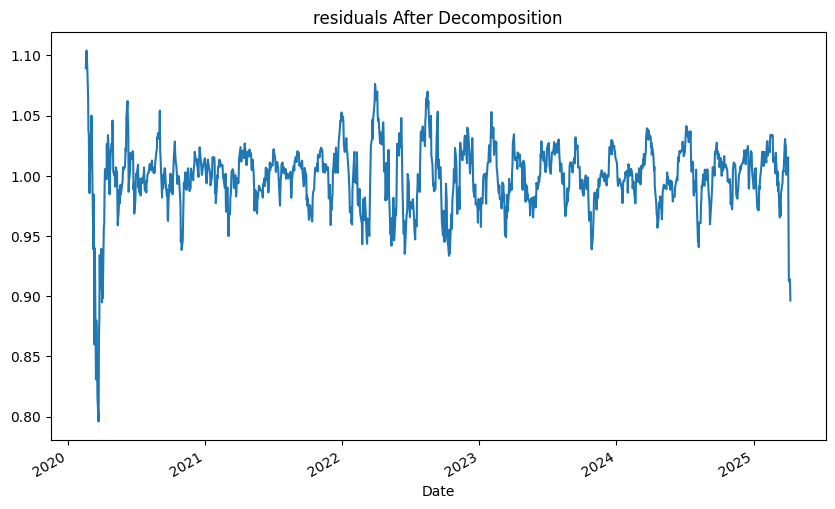

In [ ]:

# Decompose the time series data


"""The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, 
or the variation around the trend-cycle, does not vary with the level of the time series. 

When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be 
proportional to the level of the time series, then a multiplicative decomposition is more appropriate. 
"""


def Seasonal_decompose(df:pd.DataFrame, model:str):
    
    result = seasonal_decompose(df["Closing_Price"], model=model, period=63) #63 is an assumption for a quarterly seasonality 
    result.plot()
    plt.show()
    residual = result.resid

    # Plot residuals
    residual.plot(figsize=(10, 6))
    plt.title("residuals After Decomposition")
    return residual
  

residual = Seasonal_decompose(sp500_df,"multiplicative")  

 


# Analysis with Rolling Statistics

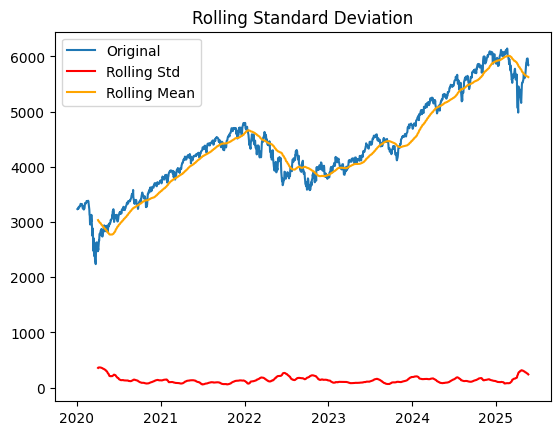

In [ ]:
#checking for variance
def plot_rollingstd(df: pd.DataFrame,col:str):
    
        rolling_std = df[col].rolling(window=63).std()
        rolling_mean = df[col].rolling(window=63).mean()
        plt.plot(df[col], label='Original')
        plt.plot(rolling_std, label='Rolling Std', color='red')
        plt.plot(rolling_mean,label="Rolling Mean",color= "orange")
        plt.legend()
        plt.title("Rolling Standard Deviation")
        plt.show() 

plot_rollingstd(sp500_df,"Closing_Price")


- **Observation**:
- From the graph above, we observe a clear non-constant mean over time, indicating non-stationarity in the mean. However, the rolling standard deviation appears relatively stable over quarterly windows.
- The true nature of variance still requires deeper analysis. When a time series exhibits a trend (non-constant mean), the rolling standard deviation calculated on the raw data can misrepresent actual changes in volatility.
- Differencing or detrending the series is necessary to uncover any hidden shifts in variance, allowing the rolling standard deviation to better reflect the true variability of the time series.


# ADF/KPPS Test for Stationarity

In [ ]:

from statsmodels.tsa.stattools import adfuller
def adf_test(df,col):

    """
    Performs the Augmented Dickey-Fuller test to check for stationarity of a time series.

    The null hypothesis of the ADF test is that the time series is non-stationary.
    A low p-value (typically ≤ 0.05) indicates that the null hypothesis can be rejected,
    meaning the time series is likely stationary. Conversely, a p-value > 0.05 suggests
    the time series is non-stationary.

    Args:
        timeseries (pd.Series): The time series data to be tested.

    Returns:
        None. Prints the ADF statistic and p-value.
        Prints a statement indicating whether the time series is stationary based on the p-value.
    """

    result_adfuller = adfuller(df[col].dropna() )
    print("ADF Statistic:", result_adfuller[0])
    print("p-value:", result_adfuller[1])
    print("Critical Values:", result_adfuller[4])# this prints the critical values as key_value pair 
    if result_adfuller[0]>(result_adfuller[4])['5%']:
        print("The time seriess is Non_Stationary")
    else:
        print("THe result is stationary")

adf_test(sp500_df,"Closing_Price")

ADF Statistic: -0.7529409389235178
p-value: 0.8325561593835111
Critical Values: {'1%': -3.4352212447633352, '5%': -2.863691278876476, '10%': -2.5679153445917}
The time seriess is Non_Stationary


In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(df,col):
    """
    (Kwiatkowski-Phillips-Schmidt-Shin Test) tests whether a time series is stationary around a mean (level stationarity) or around a deterministic trend (trend stationarity).

    How it works:
    - The test statistic is calculated based on the residuals from the regression of the time series on a constant (or constant and trend).
    - The test compares the test statistic to critical values to determine if the null hypothesis can be rejected.

    Hypotheses:
    - Null Hypothesis (H0): The time series is stationary (level or trend stationary).
    - Alternative Hypothesis (H1): The time series is non-stationary (has a unit root).

    Significance Value:
    - A typical significance level (alpha) is 0.05.
    - If the p-value is less than 0.05, reject the null hypothesis and conclude the series is non-stationary.

    """

    result_kpss = kpss(df[col])
    print("KPSS Statistic:", result_kpss[0])
    print("p-value:", result_kpss[1])
    stat = result_kpss[0]
    p_value = result_kpss[1]
    critical_values = result_kpss[3]

    if stat > critical_values['5%']:
        print(f"The time series is Non-Stationary")
    else:
        print(f"The time series is Stationary")

kpss_test(sp500_df,"Closing_Price")
   


KPSS Statistic: 4.626211759215282
p-value: 0.01
The time series is Non-Stationary


C:\Users\injil\AppData\Local\Temp\ipykernel_18000\291502307.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(df[col])


# Defining the Target Variable

Let’s create a new column `log_returns`. This column will serve as the target variable for rest of our analysis and forecasting.

- Log returns show the continuously compounded percentage change in the stock's closing price compared to the day before.

#### Interpreting Log Returns

* A **positive** value means the stock went **up** from the previous day.
* A **negative** value means the stock went **down**.
* For small numbers, you can read them like percentages:

  * A log return of 0.01 means roughly a 1% increase.
  * A log return of -0.02 means about a 2% decrease.



In [98]:

#This formula computes the natural logarithm of the ratio of each day's closing price to the previous day's closing price, which is the standard method for calculating log returns in financial analysis. 
# The result will be a new column where each entry (except the first, which will be NaN) represents the daily log return for that date.
sp500_df['Log_return'] = np.log(sp500_df['Closing_Price'] / sp500_df['Closing_Price'].shift(1))
sp500_df.head()

,Closing_Price,Log_return
Date,,
2020-01-02,3257.850098,NaN
2020-01-03,3234.850098,-0.007085
2020-01-06,3246.280029,0.003527
2020-01-07,3237.179932,-0.002807
2020-01-08,3253.050049,0.004890


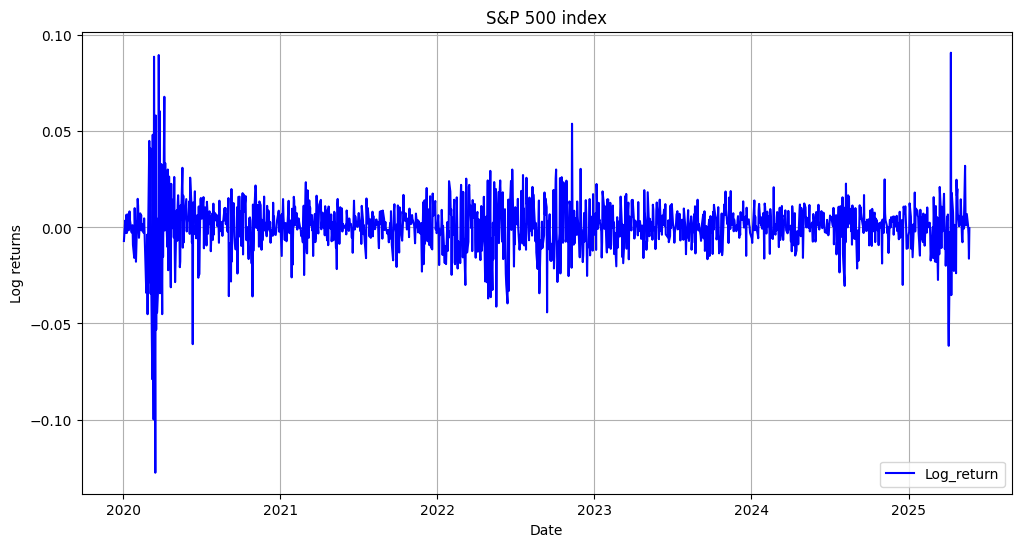

In [99]:
#plot Date vs Log_return

plot_timeseries(sp500_df,"Date","Log returns","Log_return")


- **Observation:**
The Log_return show no visible upward or downward trend at all however the comments on seasonality and varinace remain the same

# Stationarity check on Log returns

In [100]:
sp500_df["Log_return"].isnull().sum()
sp500_df=sp500_df.dropna(subset="Log_return")

In [101]:
adf_test(sp500_df,"Log_return")
print("------------------------------------------")
kpss_test(sp500_df,"Log_return")

ADF Statistic: -11.228294476694082
p-value: 1.9357578831740477e-20
Critical Values: {'1%': -3.4352212447633352, '5%': -2.863691278876476, '10%': -2.5679153445917}
THe result is stationary
------------------------------------------
KPSS Statistic: 0.04668512969706766
p-value: 0.1
The time series is Stationary


C:\Users\injil\AppData\Local\Temp\ipykernel_18000\291502307.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(df[col])



# Lets now have check on variance/std deviaition saperately.

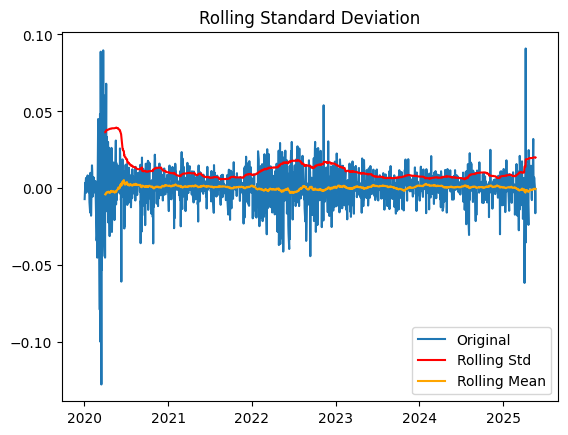

In [102]:


plot_rollingstd(sp500_df,"Log_return")


- **Implications for Modeling and Next Steps**

- Visible fluctuations in  rolling std deviation and  volatiltiy (changing varinace) in the original Log returns is also very evident 

- **Shift to volatility modeling:**  
  Since Log returns exhibit changing variance (volatility),  we will try to model it using GARCH.



# Arch effect test in log returns

- The ARCH test is commonly used before fitting GARCH or other volatility models to determine if modeling conditional heteroskedasticity is necessary.


In [103]:
"""
ARCH Test (Autoregressive Conditional Heteroskedasticity Test)

The ARCH test is a statistical test used to detect the presence of autoregressive conditional heteroskedasticity (ARCH) effects in a time series. 
ARCH effects indicate that the variance of the current error term or innovation is related to the variances of previous time periods' error terms, 
which is common in financial and economic time series.

How it works:
- The test fits a regression model to the squared residuals of a time series.
- It checks whether past squared residuals can explain the current squared residual.
- If the test statistic is significant (low p-value), it suggests the presence of ARCH effects (time-varying volatility).


Hypotheses:
- Null Hypothesis (H0): No ARCH effects (homoskedasticity; constant variance).
- Alternative Hypothesis (H1): Presence of ARCH effects (heteroskedasticity; time-varying variance).
Interpretation:
- A p-value less than the chosen significance level (e.g., 0.05) indicates rejection of the null hypothesis, suggesting the presence of ARCH effects.
"""


# ARCH test
from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(sp500_df["Log_return"].dropna())
if arch_test[1]<0.05: 
    print("Arch effects present")
else:
    print("Arch effects not present")

print("P-value: ", arch_test[1])

Arch effects present
P-value:  4.865033912853799e-88


# Modeling volatility with **GARCH**:
- We will try to forecashowt how the variance of returns changes over time, based on past shocks and past volatility. 
- The key result from GARCH is a time series of conditional volatility estimates, which are critical for understanding and managing risk in financial markets

In [ ]:
len(sp500_df)

1354

#  GARCH Model Order Selection Using AIC

- This code searches for the **optimal GARCH(p, q)** model by testing different combinations of `p` and `q` from 1 to 9.
- It fits each model to the **training portion of the returns series** (excluding the last 24 points as test data).
- For each model, it computes the **Akaike Information Criterion (AIC)** and keeps track of the model with the **lowest AIC**, which indicates the best balance between fit and complexity.
- Finally, it outputs the `(p, q)` order of the GARCH model with the **(lowest) AIC value**.



In [ ]:
from arch import arch_model
import numpy as np
test_size = 300
returns = sp500_df["Log_return"].dropna() * 100
train_data = returns[:-test_size]  # Use all data except the last 160 days for training

p_values = range(1, 10)
q_values = range(1, 10)

best_aic = np.inf
best_order = None

for p in p_values:
    for q in q_values:
        try:
            model = arch_model(train_data, vol='GARCH', p=p, q=q)
            model_fit = model.fit(disp='off')
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, q)   
        except:
            continue

print(f"Best (p,q) order by AIC: {best_order}")


Best (p,q) order by AIC: (1, 1)


In [127]:
rolling_predictions = []

p_best, q_best = best_order
for i in range(test_size):
    train = returns[:-(test_size - i)]
    model = arch_model(train, vol='GARCH', p=p_best, q=q_best)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))


In [128]:

rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

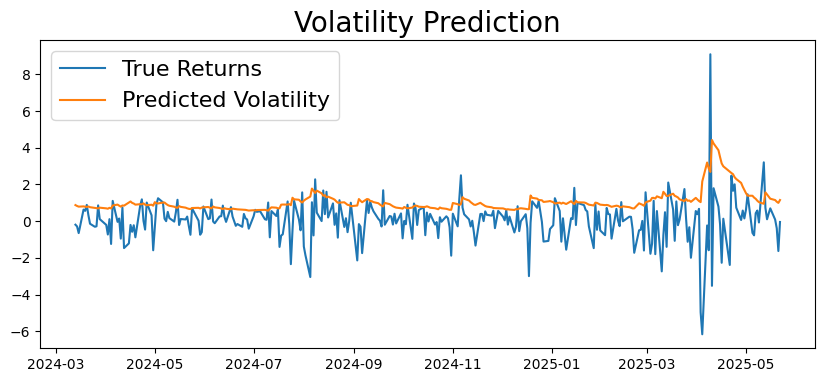

In [129]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

## Interpretation of Volatility Forecast Plot

### Expectation  
We expect predicted volatility to rise when true returns become more volatile. The model should adapt to spikes in return magnitude by forecasting higher variance.

### Observations  
- The model captures the increase in volatility during  2025 spike and shows a typical decay pattern afterward.
- Predicted volatility appears smoother than the actual return series, suggesting the model may underfit short-term fluctuations and also Underestimates some extreme movements.
